In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
file = open("data description.txt","r")
print(file.read())

The complete data description for the dataset is as follows:

1. hotel: The name or type of the hotel (Resort Hotel or City Hotel).
2. is_canceled: A binary indicator (0 or 1) representing whether the booking was canceled (1) or not (0).
3. lead_time: The number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
4. arrival_date_year: The year of the arrival date.
5. arrival_date_month: The month of the arrival date.
6. arrival_date_week_number: The week number of the year for the arrival date.
7. arrival_date_day_of_month: The day of the month for the arrival date.
8. stays_in_weekend_nights: The number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
9. stays_in_week_nights: The number of weekday nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
10. adults: The number of adults included in the reservation.
11. children: The number of children included in the reservation.
12. b

In [6]:
data = pd.read_csv("hotel_bookings.csv")


In [7]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Unnamed: 31
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,NaN
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,NaN
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,NaN
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,NaN
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,NaN


In [11]:
data.shape

(498, 32)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           498 non-null    object 
 1   is_canceled                     498 non-null    int64  
 2   lead_time                       498 non-null    int64  
 3   arrival_date_year               498 non-null    int64  
 4   arrival_date_month              498 non-null    object 
 5   arrival_date_week_number        498 non-null    int64  
 6   arrival_date_day_of_month       498 non-null    int64  
 7   stays_in_weekend_nights         498 non-null    int64  
 8   stays_in_week_nights            498 non-null    int64  
 9   adults                          498 non-null    int64  
 10  children                        498 non-null    int64  
 11  babies                          498 non-null    int64  
 12  meal                            498 

In [13]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Unnamed: 31
count,498.000000,498.000000,498.0,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,...,498.0,498.0,498.000000,453.000000,7.000000,498.0,498.000000,498.000000,498.000000,0.0
mean,0.204819,60.941767,2015.0,28.120482,8.987952,1.317269,3.785141,1.993976,0.190763,0.026104,...,0.0,0.0,0.216867,212.640177,143.000000,0.0,114.596426,0.160643,0.759036,NaN
std,0.403975,63.848370,0.0,0.795828,5.095058,1.155750,5.146156,0.383204,0.678615,0.171751,...,0.0,0.0,0.589271,72.380270,61.386752,0.0,37.138874,0.373004,0.850002,NaN
min,0.000000,0.000000,2015.0,27.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.000000,2.000000,110.000000,0.0,0.000000,0.000000,0.000000,NaN
25%,0.000000,18.250000,2015.0,27.000000,4.000000,0.000000,2.000000,2.000000,0.000000,0.000000,...,0.0,0.0,0.000000,240.000000,110.000000,0.0,94.000000,0.000000,0.000000,NaN
50%,0.000000,54.000000,2015.0,28.000000,10.000000,1.000000,3.000000,2.000000,0.000000,0.000000,...,0.0,0.0,0.000000,240.000000,110.000000,0.0,110.700000,0.000000,1.000000,NaN
75%,0.000000,88.000000,2015.0,29.000000,13.000000,2.000000,5.000000,2.000000,0.000000,0.000000,...,0.0,0.0,0.000000,241.000000,145.500000,0.0,133.810000,0.000000,1.000000,NaN
max,1.000000,737.000000,2015.0,29.000000,17.000000,6.000000,100.000000,4.000000,10.000000,2.000000,...,0.0,0.0,5.000000,306.000000,270.000000,0.0,230.670000,2.000000,3.000000,NaN


# observation
Abnomality
1) lead_time
2) stays_in_week_night
3) arrival_date_week_number



In [15]:
column = data['arrival_date_year']

column

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
493    2015
494    2015
495    2015
496    2015
497    2015
Name: arrival_date_year, Length: 498, dtype: int64

In [16]:
column = data['stays_in_weekend_nights']

column

0      0
1      0
2      0
3      0
4      0
      ..
493    2
494    3
495    1
496    1
497    1
Name: stays_in_weekend_nights, Length: 498, dtype: int64

In [21]:
column = data['adr']

column

0        0.0
1        0.0
2       75.0
3       75.0
4       98.0
       ...  
493    210.0
494    194.9
495    103.5
496    118.5
497    192.0
Name: adr, Length: 498, dtype: float64

In [ ]:
data_without_missing = data.dropna()

In [ ]:
sns.set()

In [ ]:
data = np.random.randn(10)
res = pd.Series(data,name="agent")
plot = sns.distplot(res)
plt.show()

<Axes: xlabel='lead_time', ylabel='agent'>

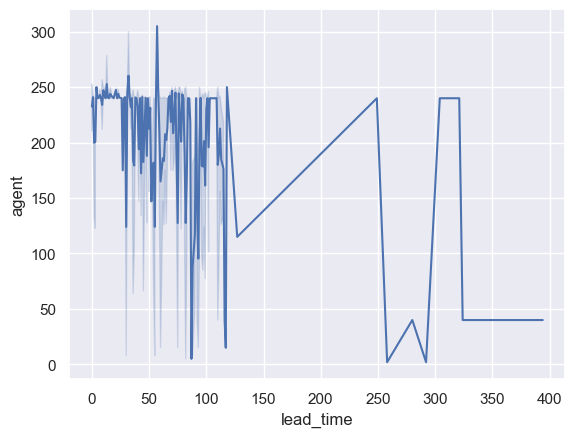